In [1]:
import pandas as pd

In [2]:
import os
import numpy as np

from pandas import to_datetime
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')
%matplotlib inline



In [3]:
data = pd.read_csv("full_weather_data.csv")

In [4]:
data = data.iloc[:, 1:]

In [5]:
data

,LOC,TM,WS,PA,TA,TD,HM,PV,RN,SD_HR3,CA_TOT,CA_MID,CH_MIN,VS,SS,SI,TS
0,강원,2020-01-01,2.0,1001.2,-3.1,-10.3,60.2,2.9,0.0,0.0,2.0,2.0,2.0,2225.0,0.2,0.18,-1.7
1,강원,2020-01-02,1.9,1000.2,-0.7,-6.7,66.9,3.8,0.0,0.0,2.0,1.0,3.0,1658.0,0.2,0.16,-0.8
2,강원,2020-01-03,1.7,998.8,0.3,-8.6,57.2,3.3,0.0,0.0,0.0,0.0,1.0,1652.0,0.3,0.20,-0.4
3,강원,2020-01-04,1.7,998.0,-0.4,-9.5,55.8,3.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.3,0.22,-0.9
4,강원,2020-01-05,0.8,1003.8,-0.9,-8.2,62.2,3.3,0.0,0.0,1.0,0.0,6.0,2250.0,0.3,0.22,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25563,충북,2024-02-08,1.0,1003.6,-0.5,-4.9,74.0,4.3,0.0,0.0,2.0,1.0,9.0,869.0,0.4,0.39,1.8
25564,충북,2024-02-09,1.4,1003.9,-0.2,-5.8,68.7,4.0,0.0,0.0,1.0,0.0,6.0,1891.0,0.4,0.39,1.7
25565,충북,2024-02-10,1.4,1005.4,0.1,-4.9,71.3,4.3,0.0,0.0,1.0,1.0,4.0,1291.0,0.2,0.28,1.1
25566,충북,2024-02-11,1.6,1006.2,-0.3,-5.1,71.4,4.2,0.0,0.0,2.0,1.0,6.0,925.0,0.2,0.23,0.4


In [6]:
data.loc[data['LOC'] == '강원']

,LOC,TM,WS,PA,TA,TD,HM,PV,RN,SD_HR3,CA_TOT,CA_MID,CH_MIN,VS,SS,SI,TS
0,강원,2020-01-01,2.0,1001.2,-3.1,-10.3,60.2,2.9,0.0,0.0,2.0,2.0,2.0,2225.0,0.2,0.18,-1.7
1,강원,2020-01-02,1.9,1000.2,-0.7,-6.7,66.9,3.8,0.0,0.0,2.0,1.0,3.0,1658.0,0.2,0.16,-0.8
2,강원,2020-01-03,1.7,998.8,0.3,-8.6,57.2,3.3,0.0,0.0,0.0,0.0,1.0,1652.0,0.3,0.20,-0.4
3,강원,2020-01-04,1.7,998.0,-0.4,-9.5,55.8,3.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.3,0.22,-0.9
4,강원,2020-01-05,0.8,1003.8,-0.9,-8.2,62.2,3.3,0.0,0.0,1.0,0.0,6.0,2250.0,0.3,0.22,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,강원,2024-02-08,0.9,995.3,-1.3,-5.6,74.6,4.1,0.0,0.0,2.0,0.0,3.0,1603.0,0.3,0.28,0.3
1500,강원,2024-02-09,1.3,995.1,-1.0,-6.2,70.3,3.9,0.0,0.0,1.0,0.0,8.0,1506.0,0.3,0.29,-0.0
1501,강원,2024-02-10,1.3,996.2,-0.5,-6.7,65.3,3.7,0.0,0.0,1.0,1.0,3.0,1454.0,0.2,0.23,-0.5
1502,강원,2024-02-11,1.6,996.7,-0.9,-7.8,63.1,3.5,0.0,0.0,2.0,1.0,5.0,1360.0,0.2,0.23,-0.8


In [7]:
data_Gangwon = data.loc[data['LOC'] == '강원']

In [8]:
data_Gangwon = data_Gangwon.iloc[:, 1:]

In [9]:
data_Gangwon

,TM,WS,PA,TA,TD,HM,PV,RN,SD_HR3,CA_TOT,CA_MID,CH_MIN,VS,SS,SI,TS
0,2020-01-01,2.0,1001.2,-3.1,-10.3,60.2,2.9,0.0,0.0,2.0,2.0,2.0,2225.0,0.2,0.18,-1.7
1,2020-01-02,1.9,1000.2,-0.7,-6.7,66.9,3.8,0.0,0.0,2.0,1.0,3.0,1658.0,0.2,0.16,-0.8
2,2020-01-03,1.7,998.8,0.3,-8.6,57.2,3.3,0.0,0.0,0.0,0.0,1.0,1652.0,0.3,0.20,-0.4
3,2020-01-04,1.7,998.0,-0.4,-9.5,55.8,3.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.3,0.22,-0.9
4,2020-01-05,0.8,1003.8,-0.9,-8.2,62.2,3.3,0.0,0.0,1.0,0.0,6.0,2250.0,0.3,0.22,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2024-02-08,0.9,995.3,-1.3,-5.6,74.6,4.1,0.0,0.0,2.0,0.0,3.0,1603.0,0.3,0.28,0.3
1500,2024-02-09,1.3,995.1,-1.0,-6.2,70.3,3.9,0.0,0.0,1.0,0.0,8.0,1506.0,0.3,0.29,-0.0
1501,2024-02-10,1.3,996.2,-0.5,-6.7,65.3,3.7,0.0,0.0,1.0,1.0,3.0,1454.0,0.2,0.23,-0.5
1502,2024-02-11,1.6,996.7,-0.9,-7.8,63.1,3.5,0.0,0.0,2.0,1.0,5.0,1360.0,0.2,0.23,-0.8


In [10]:
data_Gangwon.columns

Index(['TM', 'WS', 'PA', 'TA', 'TD', 'HM', 'PV', 'RN', 'SD_HR3', 'CA_TOT',
       'CA_MID', 'CH_MIN', 'VS', 'SS', 'SI', 'TS'],
      dtype='object')

In [11]:
test_data_Gangwon = data_Gangwon.drop(['WS', 'PA', 'TA', 'TD', 'HM', 'PV', 'RN', 'SD_HR3', 'CA_TOT', 'CA_MID', 'CH_MIN', 'VS', 'SS', 'TS'], axis=1)

In [12]:
test_data_Gangwon

,TM,SI
0,2020-01-01,0.18
1,2020-01-02,0.16
2,2020-01-03,0.20
3,2020-01-04,0.22
4,2020-01-05,0.22
...,...,...
1499,2024-02-08,0.28
1500,2024-02-09,0.29
1501,2024-02-10,0.23
1502,2024-02-11,0.23


In [13]:
test_Temp = test_data_Gangwon['SI']

In [23]:
test_data_Gangwon['TM'][0]

'2020-01-01'

In [25]:
idx_Label = []
for i in range(len(test_data_Gangwon)):
    date = test_data_Gangwon['TM'][i]
    year, month, day = date.split('-')
    if month == '01' and day == '01':
        idx_Label.append(date)
    else:
        idx_Label.append('')

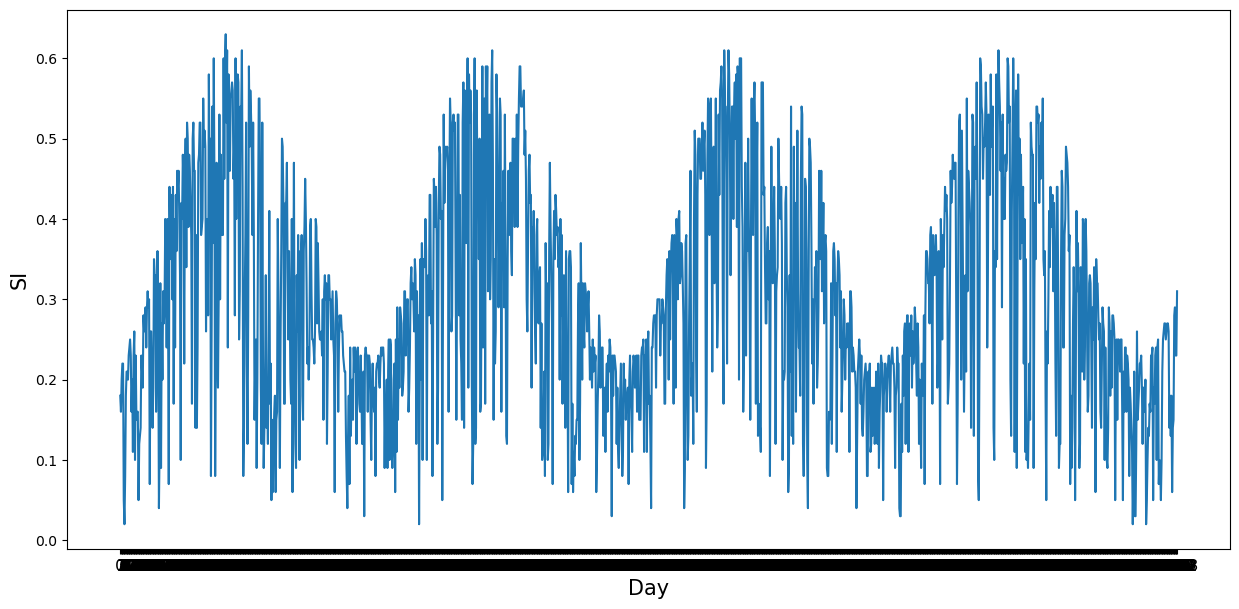

In [26]:
plt.figure(figsize=(15, 7))
plt.xlabel('Day', fontsize=15)
plt.ylabel('SI', fontsize=15)
idx_List = list(range(len(test_Temp)))
plt.plot(idx_List, test_Temp)
plt.xticks(idx_List, labels= idx_List, fontsize=12)
plt.show()

In [27]:
train_Temp = test_data_Gangwon['SI']

In [28]:
train_Temp = list(train_Temp)

In [29]:
temp_data = {0 : train_Temp}

In [30]:
temp_data = pd.DataFrame(temp_data)

In [31]:
temp_data.head()

,0
0,0.18
1,0.16
2,0.20
3,0.22
4,0.22


In [32]:
def makeSeriesData(df, n_in=30):
    for i in range(1, n_in+1):
        df[i] = df[i-1].shift(1)
    return df

In [34]:
temp_data = makeSeriesData(temp_data, 30)

In [35]:
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.16,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.20,0.16,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.22,0.20,0.16,0.18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.22,0.22,0.20,0.16,0.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
temp_data = temp_data.dropna()

In [37]:
temp_data = temp_data.reset_index(drop=True)

In [38]:
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.23,0.14,0.13,0.12,0.05,0.16,0.16,0.15,0.23,0.10,...,0.21,0.18,0.08,0.02,0.05,0.22,0.22,0.20,0.16,0.18
1,0.21,0.23,0.14,0.13,0.12,0.05,0.16,0.16,0.15,0.23,...,0.21,0.21,0.18,0.08,0.02,0.05,0.22,0.22,0.20,0.16
2,0.19,0.21,0.23,0.14,0.13,0.12,0.05,0.16,0.16,0.15,...,0.20,0.21,0.21,0.18,0.08,0.02,0.05,0.22,0.22,0.20
3,0.28,0.19,0.21,0.23,0.14,0.13,0.12,0.05,0.16,0.16,...,0.23,0.20,0.21,0.21,0.18,0.08,0.02,0.05,0.22,0.22
4,0.26,0.28,0.19,0.21,0.23,0.14,0.13,0.12,0.05,0.16,...,0.24,0.23,0.20,0.21,0.21,0.18,0.08,0.02,0.05,0.22


In [39]:
temp_data = np.array(temp_data)

In [40]:
#from sklearn.model_selection import train_test_split

In [41]:
X_train, Y_train = temp_data[:, :-1], temp_data[:, -1] 

In [42]:
X_train.shape

(1474, 30)

In [80]:
#X_train, X_test, Y_train, Y_test = train_test_split(temp_data[:, :-1], temp_data[:, -1], train_size=0.7, test_size=0.3, shuffle=False)

In [81]:
#X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [43]:
len(X_train)

1474

In [44]:
from keras.layers import Embedding, Dense, LSTM, Dropout, Flatten, TimeDistributed, Conv1D, MaxPooling1D
from keras.models import Model
from keras import Input
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [45]:
model = Sequential()
model.add(LSTM(256, kernel_initializer='he_normal', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1))

In [46]:
model.compile(loss='mse', optimizer='adam')

In [47]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history = model.fit(X_train, Y_train, epochs=150, batch_size=32)

Epoch 1/150

47/47 [==============================] - 2s 24ms/step - loss: 0.0518
Epoch 2/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0139
Epoch 3/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0136
Epoch 4/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0132
Epoch 5/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0124
Epoch 6/150
47/47 [==============================] - 1s 23ms/step - loss: 0.0142
Epoch 7/150
47/47 [==============================] - 1s 23ms/step - loss: 0.0125
Epoch 8/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0132
Epoch 9/150
47/47 [==============================] - 1s 23ms/step - loss: 0.0131
Epoch 10/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0127
Epoch 11/150
47/47 [==============================] - 1s 23ms/step - loss: 0.0124
Epoch 12/150
47/47 [==============================] - 1s 24ms/step - loss: 0.0123
Epoch 13/150
47/47 [====

In [48]:
def model_predict(model, history, input_Length):
    X_input = np.array(history[-input_Length:]).reshape(1, input_Length, 1)
    Y_hat = model.predict(X_input)
    return Y_hat[0]

In [50]:
test_predict = model_predict(model, train_Temp, 30)

1/1 [==============================] - 0s 138ms/step


In [51]:
test_predict

array([0.23037189], dtype=float32)

In [52]:
test_Temp[0]

0.18

In [53]:
def rmse(outputs, labels):
    return np.sqrt(((outputs - labels) ** 2).mean())

In [54]:
def walk_forward_validation(model, train_data, test_data, input_Length):
    predict_List = []
    history = train_data.copy()
    for i in range(len(test_data)):
        Y_hat = model_predict(model, history, input_Length)
        predict_List.append(Y_hat)
        history.append(test_data[i])
    predict_array = np.array(predict_List)
    error = rmse(predict_array, test_data)
    return error, predict_List

In [56]:
error, predictions = walk_forward_validation(model, list(train_Temp), list(test_Temp), 30)

1/1 [==============================] - 0s 18ms/step


In [57]:
error

0.16805481691442042

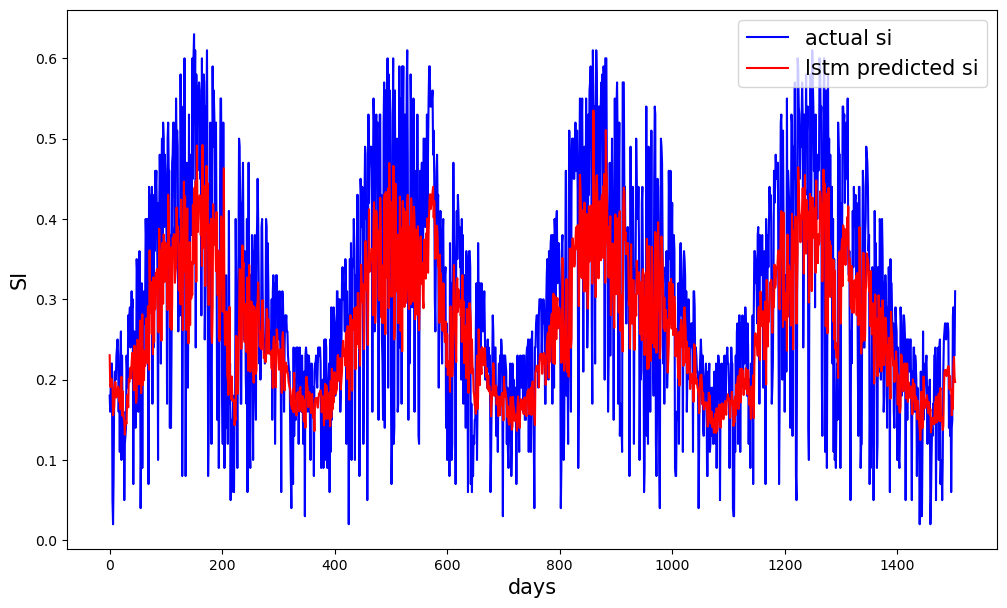

In [58]:
plt.figure(figsize=(12, 7))
plt.xlabel('days', fontsize=15)
plt.ylabel('SI', fontsize=15)
idx_List = list(range(len(test_Temp)))
plt.plot(idx_List, test_Temp, 'b', label='actual si')
plt.plot(idx_List, predictions, 'r', label='lstm predicted si')
plt.legend(loc='best', fontsize=15)

In [90]:

start_date = pd.to_datetime('2024-02-13')
end_date = pd.to_datetime('2024-12-31')


last_30_days = np.array(train_Temp[:]).reshape(1, len(train_Temp), 1)


predicted_values = list(test_Temp)

current_date = start_date
while current_date <= end_date:
  
    next_day_prediction = model.predict(last_30_days)[0][0]
    predicted_values.append(next_day_prediction)
    last_30_days = np.append(last_30_days, [[[next_day_prediction]]], axis=1)
    current_date += pd.Timedelta(days=1)

predicted_data = pd.DataFrame({
    'Date': pd.date_range(start=start_date, end=end_date),
    'Predicted_SI': predicted_values
})

1/1 [==============================] - 0s 146ms/step


ValueError: All arrays must be of the same length

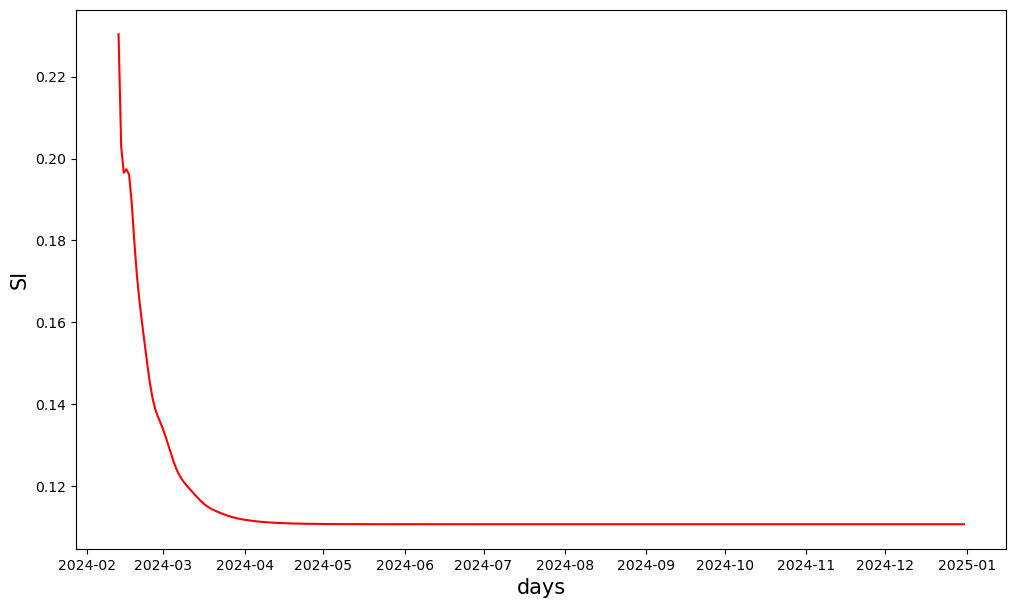

In [92]:
plt.figure(figsize=(12, 7))
plt.xlabel('days', fontsize=15)
plt.ylabel('SI', fontsize=15)
plt.plot(predicted_data['Date'], predicted_data['Predicted_SI'], 'r', label='lstm predicted si')
plt.show()

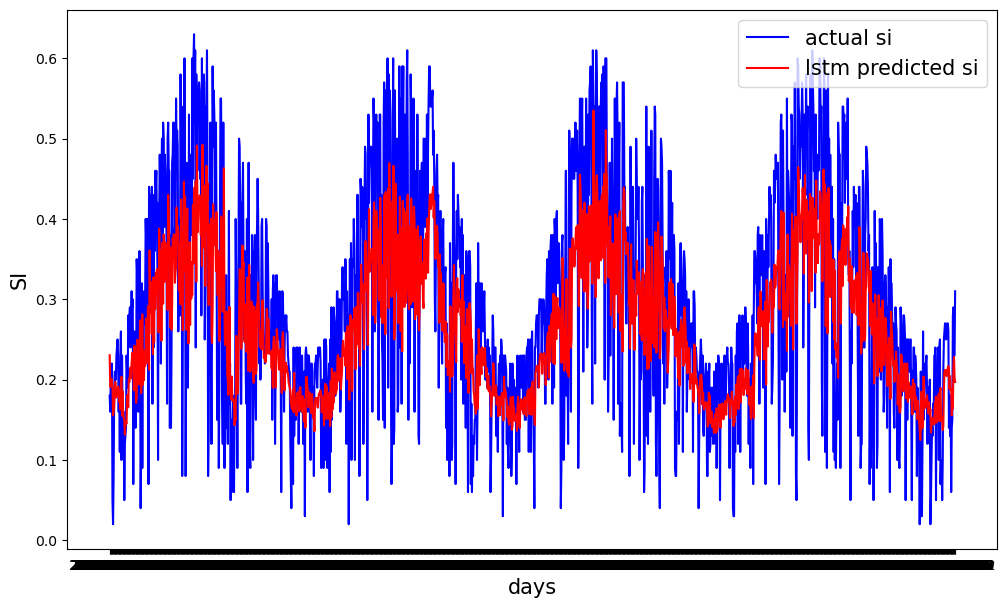

In [74]:
plt.figure(figsize=(12, 7))
plt.xlabel('days', fontsize=15)
plt.ylabel('SI', fontsize=15)
idx_List = list(range(len(test_Temp)))
plt.plot(test_data_Gangwon['TM'], test_Temp, 'b', label='actual si')
plt.plot(test_data_Gangwon['TM'], predictions, 'r', label='lstm predicted si')

plt.legend(loc='best', fontsize=15)

In [13]:
data = test_data_Gangwon.copy()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [15]:
data.set_index('TM', inplace=True)

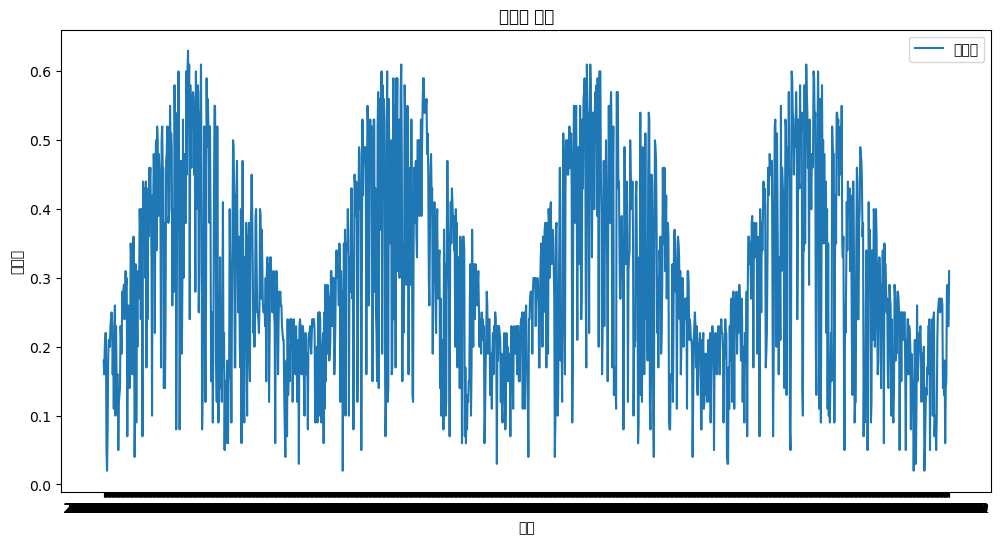

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(data['SI'], label='일사량')
plt.title('일사량 변화')
plt.xlabel('날짜')
plt.ylabel('일사량')
plt.legend()
plt.show()

In [123]:
train_size = int(len(data) * 0.7)
train_data = data['SI'][:train_size]
test_data = data['SI'][train_size:]


# LSTM 모델을 통한 기상 예측
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(data['SI']).reshape(-1, 1))

def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 30
X, Y = create_dataset(scaled_data, time_steps)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [124]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [125]:
lstm_model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
33/33 - 2s - loss: 0.0761 - 2s/epoch - 62ms/step
Epoch 2/100
33/33 - 0s - loss: 0.0388 - 220ms/epoch - 7ms/step
Epoch 3/100
33/33 - 0s - loss: 0.0378 - 281ms/epoch - 9ms/step
Epoch 4/100
33/33 - 0s - loss: 0.0378 - 241ms/epoch - 7ms/step
Epoch 5/100
33/33 - 0s - loss: 0.0368 - 220ms/epoch - 7ms/step
Epoch 6/100
33/33 - 0s - loss: 0.0367 - 224ms/epoch - 7ms/step
Epoch 7/100
33/33 - 0s - loss: 0.0370 - 229ms/epoch - 7ms/step
Epoch 8/100
33/33 - 0s - loss: 0.0372 - 228ms/epoch - 7ms/step
Epoch 9/100
33/33 - 0s - loss: 0.0367 - 239ms/epoch - 7ms/step
Epoch 10/100
33/33 - 0s - loss: 0.0365 - 235ms/epoch - 7ms/step
Epoch 11/100
33/33 - 0s - loss: 0.0362 - 213ms/epoch - 6ms/step
Epoch 12/100
33/33 - 0s - loss: 0.0360 - 218ms/epoch - 7ms/step
Epoch 13/100
33/33 - 0s - loss: 0.0360 - 213ms/epoch - 6ms/step
Epoch 14/100
33/33 - 0s - loss: 0.0360 - 215ms/epoch - 7ms/step
Epoch 15/100
33/33 - 0s - loss: 0.0359 - 217ms/epoch - 7ms/step
Epoch 16/100
33/33 - 0s - loss: 0.0355 - 213ms/epoc

14/14 [==============================] - 0s 3ms/step


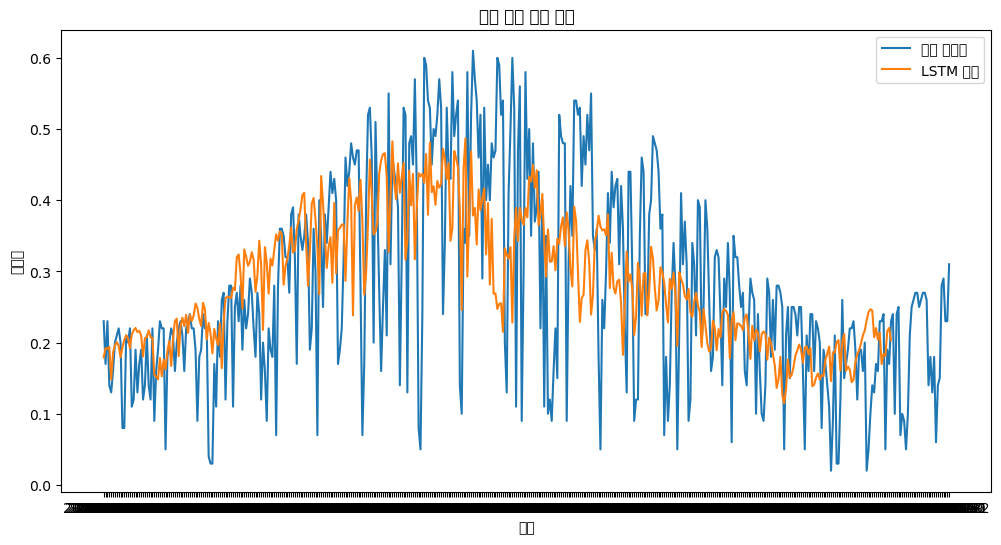

In [126]:
# LSTM 예측 결과를 실제 데이터 크기에 맞게 조정
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast).reshape(-1)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='실제 데이터')
plt.plot(test_data.index[:len(lstm_forecast)], lstm_forecast, label='LSTM 예측')
plt.title('기상 예측 결과 비교')
plt.xlabel('날짜')
plt.ylabel('일사량')
plt.legend()
plt.show()

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [171]:
# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 데이터셋 생성 함수 정의
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), :]
        X.append(a)
        Y.append(dataset[i + time_steps, :])
    return np.array(X), np.array(Y)

# 하이퍼파라미터 설정
time_steps = 30  # 시계열 데이터를 몇 일 단위로 보고 예측할 것인지 설정
n_features = data.shape[1]  # 특징의 개수

# 데이터셋 생성
X, Y = create_dataset(scaled_data, time_steps)
n_train_samples = int(0.7 * len(X))  # 훈련 샘플 개수
X_train, X_test = X[:n_train_samples], X[n_train_samples:]
Y_train, Y_test = Y[:n_train_samples], Y[n_train_samples:]

In [174]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')


In [175]:
# 모델 훈련
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
33/33 - 1s - loss: 0.0767 - 1s/epoch - 39ms/step
Epoch 2/100
33/33 - 0s - loss: 0.0275 - 378ms/epoch - 11ms/step
Epoch 3/100
33/33 - 0s - loss: 0.0251 - 321ms/epoch - 10ms/step
Epoch 4/100
33/33 - 0s - loss: 0.0242 - 321ms/epoch - 10ms/step
Epoch 5/100
33/33 - 0s - loss: 0.0242 - 313ms/epoch - 9ms/step
Epoch 6/100
33/33 - 0s - loss: 0.0232 - 313ms/epoch - 9ms/step
Epoch 7/100
33/33 - 0s - loss: 0.0230 - 327ms/epoch - 10ms/step
Epoch 8/100
33/33 - 0s - loss: 0.0223 - 323ms/epoch - 10ms/step
Epoch 9/100
33/33 - 0s - loss: 0.0221 - 313ms/epoch - 9ms/step
Epoch 10/100
33/33 - 0s - loss: 0.0219 - 325ms/epoch - 10ms/step
Epoch 11/100
33/33 - 0s - loss: 0.0213 - 304ms/epoch - 9ms/step
Epoch 12/100
33/33 - 0s - loss: 0.0215 - 305ms/epoch - 9ms/step
Epoch 13/100
33/33 - 0s - loss: 0.0212 - 303ms/epoch - 9ms/step
Epoch 14/100
33/33 - 0s - loss: 0.0209 - 309ms/epoch - 9ms/step
Epoch 15/100
33/33 - 0s - loss: 0.0212 - 314ms/epoch - 10ms/step
Epoch 16/100
33/33 - 0s - loss: 0.0209 - 301

In [177]:
# 향후 1년간의 데이터 예측
future_predictions = []
current_batch = X_test[-1].reshape((1, time_steps, n_features)).copy()
for i in range(365):  # 1년간의 데이터 예측
    future_prediction = model.predict(current_batch)[0]
    future_predictions.append(future_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[future_prediction]], axis=1)

# 예측 결과 역정규화
future_predictions = scaler.inverse_transform(future_predictions)


1/1 [==============================] - 0s 19ms/step


In [145]:
len(future_predictions)

365

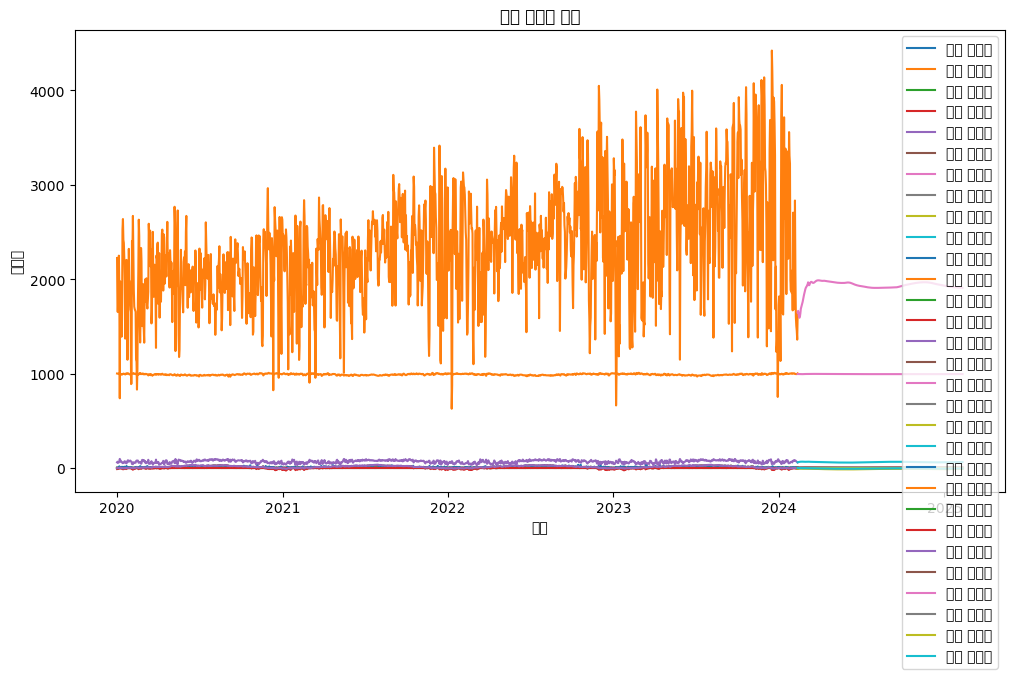

In [180]:
data.index = pd.to_datetime(data.index)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, label='실제 데이터')

# 예측된 데이터에 대한 날짜 범위 생성
predicted_dates = pd.date_range(start=data.index[-1], periods=len(future_predictions), freq='D')
plt.plot(predicted_dates, future_predictions, label='예측 데이터')

plt.title('기상 데이터 예측')
plt.xlabel('날짜')
plt.ylabel('일사량')
plt.legend()
plt.show()

In [189]:
X.shape

(1474, 30, 15)

In [183]:
features = ['WS', 'PA', 'TA', 'TD', 'HM', 'PV', 'RN', 'SD_HR3', 'CA_TOT', 'CA_MID', 'CH_MIN', 'VS', 'SS', 'SI', 'TS']
data = data[features]

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 데이터셋 생성 함수 정의
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), :]
        X.append(a)
        Y.append(dataset[i + time_steps, :])
    return np.array(X), np.array(Y)

# 하이퍼파라미터 설정
time_steps = 7  # 시계열 데이터를 몇 일 단위로 보고 예측할 것인지 설정
n_features = data.shape[1]  # 특징의 개수

# 데이터셋 생성
X, Y = create_dataset(scaled_data, time_steps)
n_train_samples = int(0.7 * len(X))  # 훈련 샘플 개수
X_train, X_test = X[:n_train_samples], X[n_train_samples:]
Y_train, Y_test = Y[:n_train_samples], Y[n_train_samples:]

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [184]:
# 모델 훈련
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
33/33 - 1s - loss: 0.0959 - 1s/epoch - 38ms/step
Epoch 2/100
33/33 - 0s - loss: 0.0295 - 319ms/epoch - 10ms/step
Epoch 3/100
33/33 - 0s - loss: 0.0258 - 312ms/epoch - 9ms/step
Epoch 4/100
33/33 - 0s - loss: 0.0244 - 326ms/epoch - 10ms/step
Epoch 5/100
33/33 - 0s - loss: 0.0238 - 320ms/epoch - 10ms/step
Epoch 6/100
33/33 - 0s - loss: 0.0235 - 315ms/epoch - 10ms/step
Epoch 7/100
33/33 - 0s - loss: 0.0233 - 311ms/epoch - 9ms/step
Epoch 8/100
33/33 - 0s - loss: 0.0227 - 344ms/epoch - 10ms/step
Epoch 9/100
33/33 - 0s - loss: 0.0223 - 407ms/epoch - 12ms/step
Epoch 10/100
33/33 - 0s - loss: 0.0221 - 379ms/epoch - 11ms/step
Epoch 11/100
33/33 - 0s - loss: 0.0221 - 378ms/epoch - 11ms/step
Epoch 12/100
33/33 - 0s - loss: 0.0218 - 340ms/epoch - 10ms/step
Epoch 13/100
33/33 - 0s - loss: 0.0219 - 310ms/epoch - 9ms/step
Epoch 14/100
33/33 - 0s - loss: 0.0213 - 314ms/epoch - 10ms/step
Epoch 15/100
33/33 - 0s - loss: 0.0209 - 308ms/epoch - 9ms/step
Epoch 16/100
33/33 - 0s - loss: 0.0210 - 

In [185]:
# 향후 1년간의 데이터 예측
future_predictions = []
current_batch = X_test[-1].reshape((1, time_steps, n_features)).copy()
for i in range(365):  # 1년간의 데이터 예측
    future_prediction = model.predict(current_batch)[0]
    future_predictions.append(future_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[future_prediction]], axis=1)

# 예측 결과 역정규화
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 16ms/step


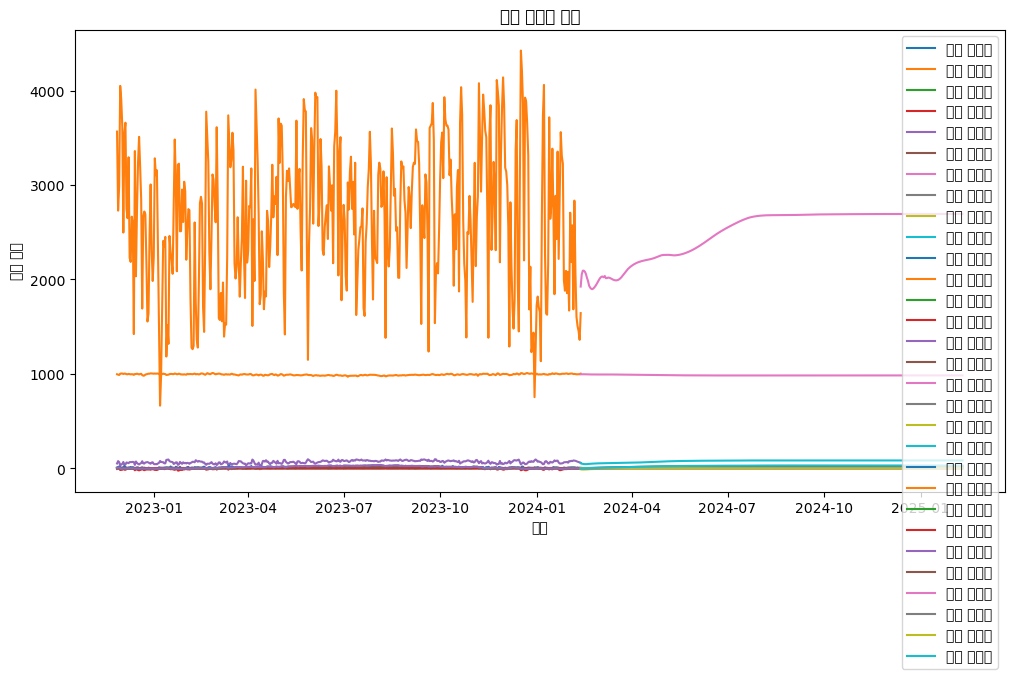

In [186]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(Y_test):], scaler.inverse_transform(Y_test), label='실제 데이터')
plt.plot(pd.date_range(start=data.index[-1], periods=len(future_predictions), freq='D'), future_predictions, label='예측 데이터')
plt.title('기상 데이터 예측')
plt.xlabel('날짜')
plt.ylabel('종합 예측')
plt.legend()
plt.show()

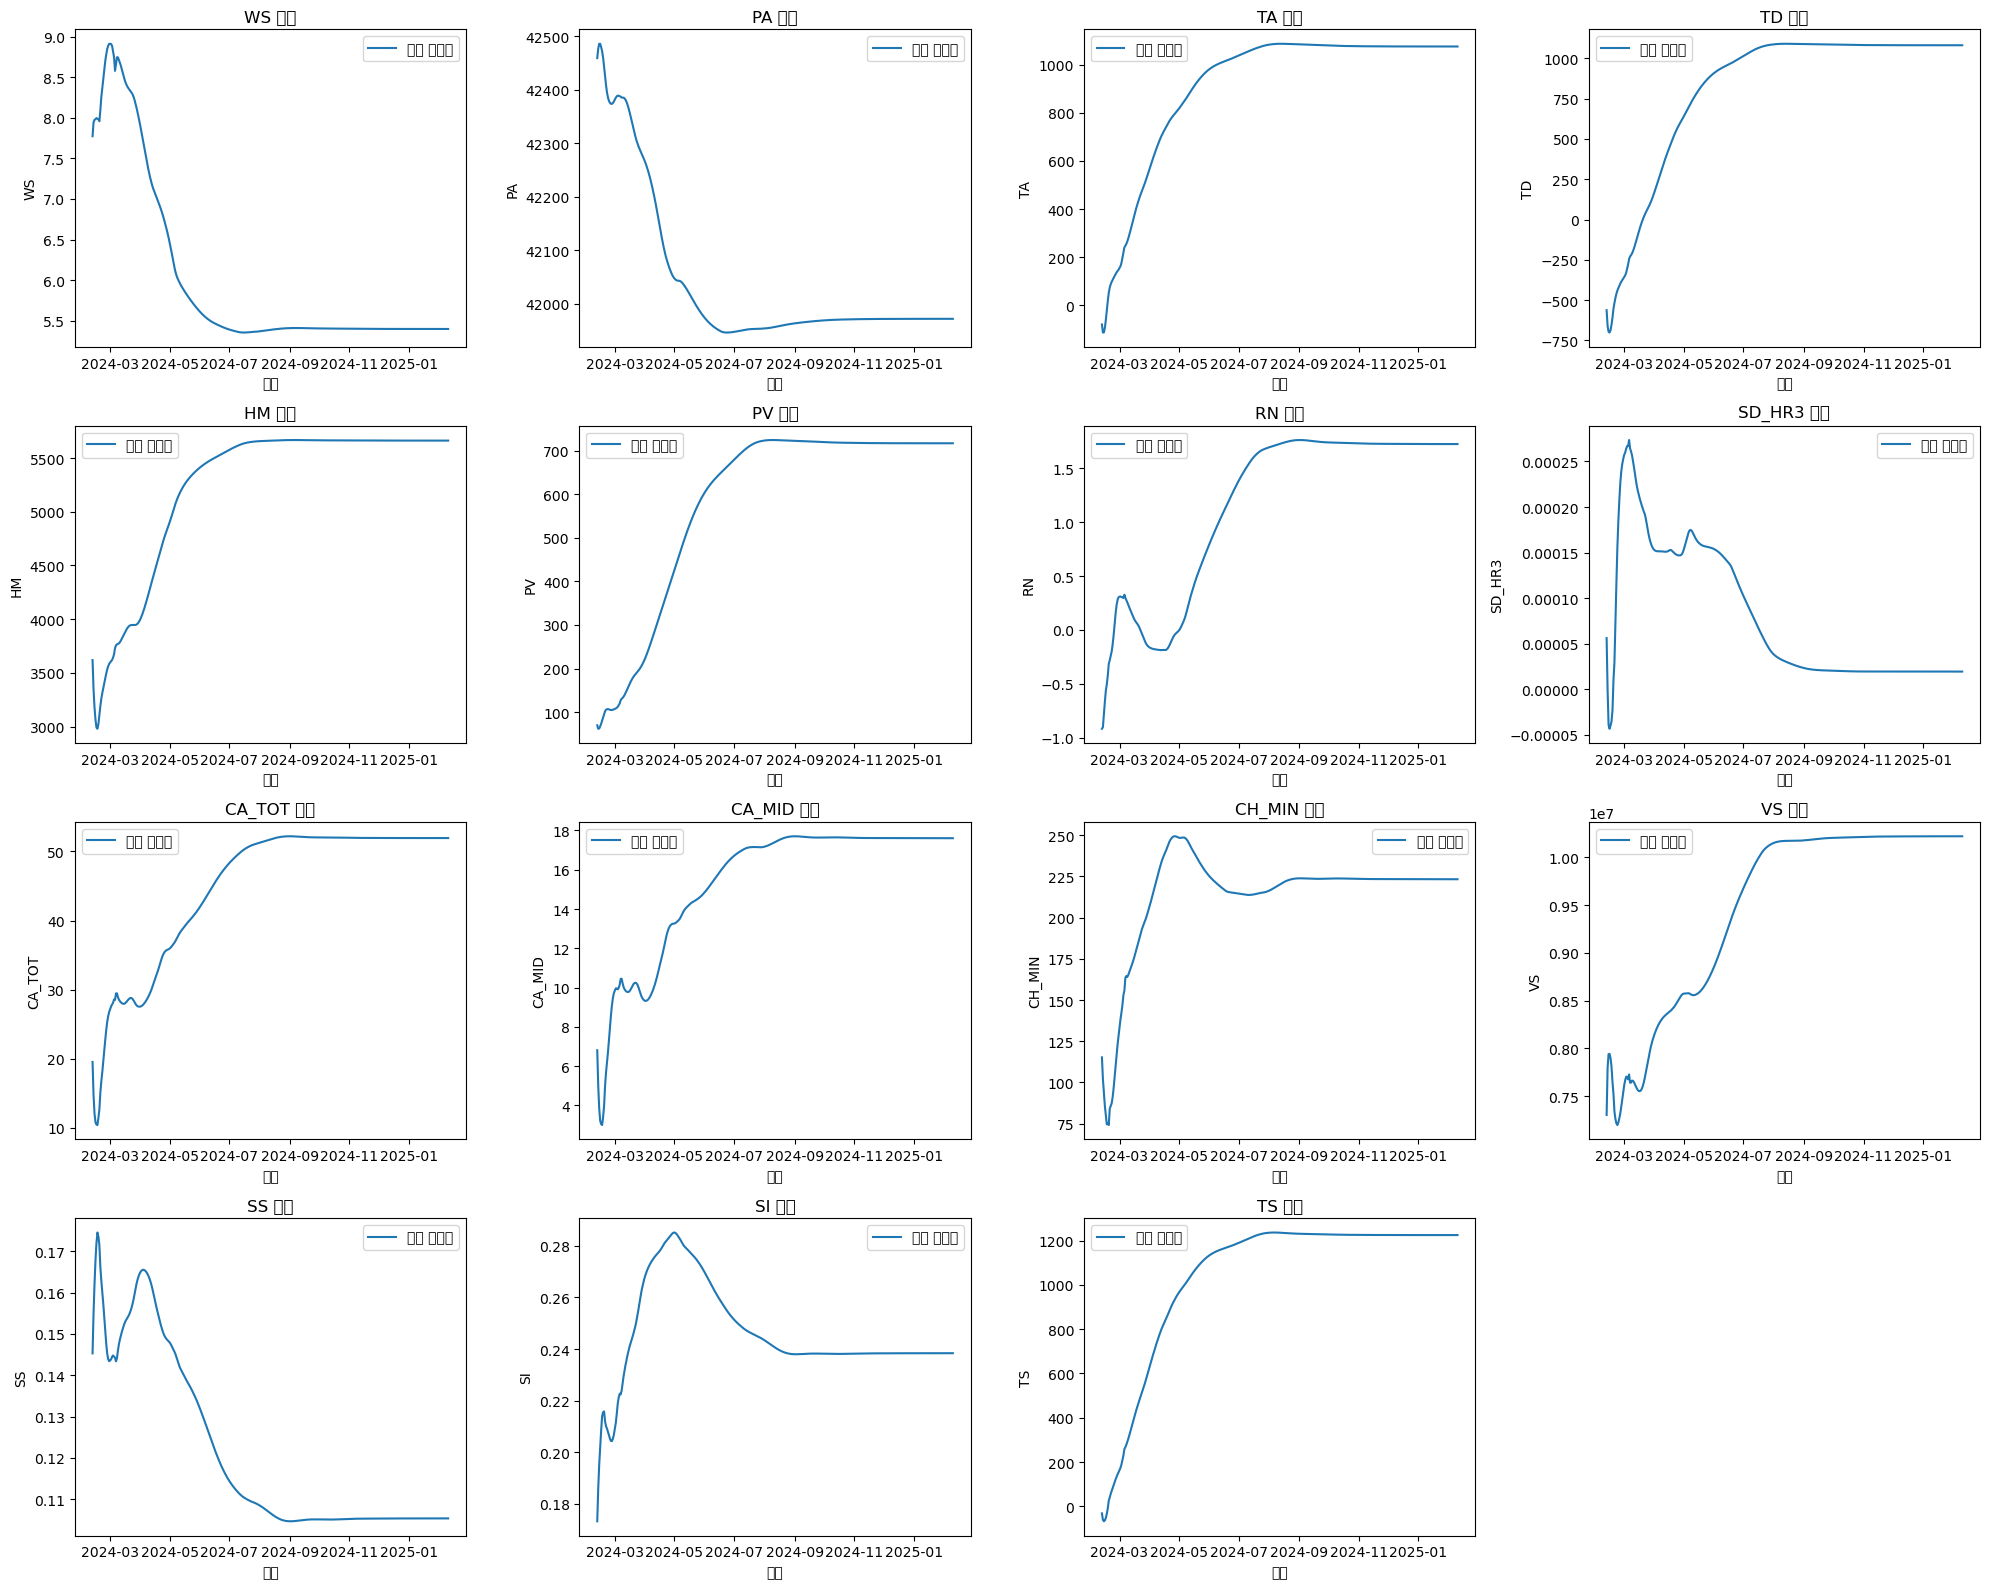

In [187]:
# 예측 결과 역정규화
future_predictions = scaler.inverse_transform(future_predictions)

# 예측된 데이터를 각 컬럼에 맞게 분리
predicted_WS = future_predictions[:, 0]
predicted_PA = future_predictions[:, 1]
predicted_TA = future_predictions[:, 2]
predicted_TD = future_predictions[:, 3]
predicted_HM = future_predictions[:, 4]
predicted_PV = future_predictions[:, 5]
predicted_RN = future_predictions[:, 6]
predicted_SD_HR3 = future_predictions[:, 7]
predicted_CA_TOT = future_predictions[:, 8]
predicted_CA_MID = future_predictions[:, 9]
predicted_CH_MIN = future_predictions[:, 10]
predicted_VS = future_predictions[:, 11]
predicted_SS = future_predictions[:, 12]
predicted_SI = future_predictions[:, 13]
predicted_TS = future_predictions[:, 14]

# 시각화
plt.figure(figsize=(20, 16))

# WS 컬럼에 대한 시각화
plt.subplot(4, 4, 1)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_WS), freq='D'), predicted_WS, label='예측 데이터')
plt.title('WS 예측')
plt.xlabel('날짜')
plt.ylabel('WS')
plt.legend()

# PA 컬럼에 대한 시각화
plt.subplot(4, 4, 2)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_PA), freq='D'), predicted_PA, label='예측 데이터')
plt.title('PA 예측')
plt.xlabel('날짜')
plt.ylabel('PA')
plt.legend()

# TA 컬럼에 대한 시각화
plt.subplot(4, 4, 3)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_TA), freq='D'), predicted_TA, label='예측 데이터')
plt.title('TA 예측')
plt.xlabel('날짜')
plt.ylabel('TA')
plt.legend()

# TD 컬럼에 대한 시각화
plt.subplot(4, 4, 4)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_TD), freq='D'), predicted_TD, label='예측 데이터')
plt.title('TD 예측')
plt.xlabel('날짜')
plt.ylabel('TD')
plt.legend()

# HM 컬럼에 대한 시각화
plt.subplot(4, 4, 5)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_HM), freq='D'), predicted_HM, label='예측 데이터')
plt.title('HM 예측')
plt.xlabel('날짜')
plt.ylabel('HM')
plt.legend()

# PV 컬럼에 대한 시각화
plt.subplot(4, 4, 6)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_PV), freq='D'), predicted_PV, label='예측 데이터')
plt.title('PV 예측')
plt.xlabel('날짜')
plt.ylabel('PV')
plt.legend()

# RN 컬럼에 대한 시각화
plt.subplot(4, 4, 7)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_RN), freq='D'), predicted_RN, label='예측 데이터')
plt.title('RN 예측')
plt.xlabel('날짜')
plt.ylabel('RN')
plt.legend()

# SD_HR3 컬럼에 대한 시각화
plt.subplot(4, 4, 8)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_SD_HR3), freq='D'), predicted_SD_HR3, label='예측 데이터')
plt.title('SD_HR3 예측')
plt.xlabel('날짜')
plt.ylabel('SD_HR3')
plt.legend()

# CA_TOT 컬럼에 대한 시각화
plt.subplot(4, 4, 9)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_CA_TOT), freq='D'), predicted_CA_TOT, label='예측 데이터')
plt.title('CA_TOT 예측')
plt.xlabel('날짜')
plt.ylabel('CA_TOT')
plt.legend()

# CA_MID 컬럼에 대한 시각화
plt.subplot(4, 4, 10)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_CA_MID), freq='D'), predicted_CA_MID, label='예측 데이터')
plt.title('CA_MID 예측')
plt.xlabel('날짜')
plt.ylabel('CA_MID')
plt.legend()

# CH_MIN 컬럼에 대한 시각화
plt.subplot(4, 4, 11)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_CH_MIN), freq='D'), predicted_CH_MIN, label='예측 데이터')
plt.title('CH_MIN 예측')
plt.xlabel('날짜')
plt.ylabel('CH_MIN')
plt.legend()

# VS 컬럼에 대한 시각화
plt.subplot(4, 4, 12)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_VS), freq='D'), predicted_VS, label='예측 데이터')
plt.title('VS 예측')
plt.xlabel('날짜')
plt.ylabel('VS')
plt.legend()

# SS 컬럼에 대한 시각화
plt.subplot(4, 4, 13)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_SS), freq='D'), predicted_SS, label='예측 데이터')
plt.title('SS 예측')
plt.xlabel('날짜')
plt.ylabel('SS')
plt.legend()

# SI 컬럼에 대한 시각화
plt.subplot(4, 4, 14)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_SI), freq='D'), predicted_SI, label='예측 데이터')
plt.title('SI 예측')
plt.xlabel('날짜')
plt.ylabel('SI')
plt.legend()

# TS 컬럼에 대한 시각화
plt.subplot(4, 4, 15)
plt.plot(pd.date_range(start=data.index[-1], periods=len(predicted_TS), freq='D'), predicted_TS, label='예측 데이터')
plt.title('TS 예측')
plt.xlabel('날짜')
plt.ylabel('TS')
plt.legend()

plt.tight_layout()
plt.show()